In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import nltk
from rake_nltk import Rake
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Load your dataset
df = pd.read_csv("scholarshipdata800.csv")

display(df)	

,Timestamp,Email Address,1. Age (in January 2025),2. Gender,3. Citizenship Status,4. What is your household's monthly income range?,5. Number of SPM subjects,6. Grades for each core SPM subjects [Bahasa Melayu],6. Grades for each core SPM subjects [Bahasa Inggeris],6. Grades for each core SPM subjects [Sejarah],...,"7. Grades for each additional SPM subject ( If you did not take the subject, please select ""None"" ) [Kimia]","7. Grades for each additional SPM subject ( If you did not take the subject, please select ""None"" ) [Biologi]","7. Grades for each additional SPM subject ( If you did not take the subject, please select ""None"" ) [Prinsip Perakaunan]","7. Grades for each additional SPM subject ( If you did not take the subject, please select ""None"" ) [Ekonomi]",8. PAJSK Score (range: 0.00 – 10.00),"9. Top 5 Co-curricular Highest Achievements\n\nExample:\n- Gold Medalist in the International Mathematics Olympiad (IMO) 2023\n- President of the Science & Innovation Club, Organized National STEM Fair 2022\n- Captain of the State Football Team, Represented Malaysia in ASEAN Youth Championship\n(Please continue in this format until you have listed 5 achievements.)","10. What is your CGPA for your pre-university program?\n(e.g., Diploma, Foundation, Matrikulasi, or STPM)\n\nExample: \n3.96",11. What is your CGPA for your first semester in degree study? \n\nExample: \n3.96,12. What is your current field of study?,"13. Are you currently receiving a merit-based scholarship (not a loan or PTPTN)?\n(e.g., JPA, university excellence scholarship, state foundation scholarships, etc)"
0,3/27/2025 18:50:37,sri.lloyd@gmail.com,23,Female,Malaysian,"Below RM4,850",9,C,B+,A-,...,C,E,B+,C,8.5,national/state awards,3.75,3.69,Actuarial Science / Statistics,Yes
1,3/27/2025 18:50:37,li-musa461@gmail.com,21,Male,Malaysian,"RM7,101 – RM10,970",9,B+,D,C,...,A-,E,A+ / A,C,7.5,national/state awards,3.75,3.69,Economics / Public Policy,Yes
2,3/27/2025 18:50:37,alyona-delgado@gmail.com,22,Female,Malaysian,"RM10,971 – RM15,040",11,C+,B+,C,...,A-,A+ / A,B,B+,9.2,Leadership roles,3.92,3.75,Law / Legal Studies,Yes
3,3/27/2025 18:50:37,isabelnovikov320@gmail.com,22,Male,Malaysian,"RM4,851 – RM7,100",10,B+,A-,B+,...,C+,C,B+,A+ / A,7.5,Leadership roles,3.92,3.58,"Business, Management & Finance",Yes
4,3/27/2025 18:50:37,shanti.morris451@gmail.com,21,Male,Malaysian,"RM7,101 – RM10,970",10,E,C,C+,...,D,A+ / A,A+ / A,D,7.5,national/state awards,3.55,3.97,Accounting,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,5/10/2025 23:30,NaN,23,Female,Malaysian,"RM10,971 – RM15,040",9,G,C,A,...,D,NaN,NaN,NaN,9.62,- Member of Library Club\n- Attended Motivati...,2.62,3.66,Engineering,No
829,5/10/2025 23:31,NaN,20,Female,Malaysian,"Below RM4,850",9,C+,B+,C+,...,NaN,NaN,NaN,NaN,4.55,"""""""- Volunteer in Blood Donation Drive\n- Assi...",3.73,3.59,Actuarial Science / Statistics,No
830,5/10/2025 23:32,NaN,20,Female,Malaysian,"Above RM15,040",11,A-,C,B+,...,NaN,NaN,A,B+,6.86,"""""""- Class Monitor\n- Represented School in Dr...",3.06,3.28,Computer Science & Information Technology,No
831,5/10/2025 23:33,NaN,20,Female,Malaysian,"Below RM4,850",9,C+,C+,B+,...,G,A+,NaN,C+,7.63,"""""""- Member of Library Club\n- Participated in...",2.6,2.96,"Business, Management & Finance",No


In [8]:
# Rename all columns 
df.columns = [
    'timestamp', 'email', 'age', 'gender', 'citizenshipStatus',
    'householdIncome', 'numSPMSubjects', 'spmBahasaMelayu', 'spmEnglish',
    'spmHistory', 'spmMath', 'spmIslamicStudies', 'spmMoralStudies',
    'spmAddMath', 'spmPhysics', 'spmChemistry', 'spmBiology',
    'spmAccounting', 'spmEconomics', 'pajskScore', 'top5Achievements',
    'preUniCGPA', 'semesterCGPA', 'fieldStudy', 'scholarshipStatus'
]

display(df)	

,timestamp,email,age,gender,citizenshipStatus,householdIncome,numSPMSubjects,spmBahasaMelayu,spmEnglish,spmHistory,...,spmChemistry,spmBiology,spmAccounting,spmEconomics,pajskScore,top5Achievements,preUniCGPA,semesterCGPA,fieldStudy,scholarshipStatus
0,3/27/2025 18:50:37,sri.lloyd@gmail.com,23,Female,Malaysian,"Below RM4,850",9,C,B+,A-,...,C,E,B+,C,8.5,national/state awards,3.75,3.69,Actuarial Science / Statistics,Yes
1,3/27/2025 18:50:37,li-musa461@gmail.com,21,Male,Malaysian,"RM7,101 – RM10,970",9,B+,D,C,...,A-,E,A+ / A,C,7.5,national/state awards,3.75,3.69,Economics / Public Policy,Yes
2,3/27/2025 18:50:37,alyona-delgado@gmail.com,22,Female,Malaysian,"RM10,971 – RM15,040",11,C+,B+,C,...,A-,A+ / A,B,B+,9.2,Leadership roles,3.92,3.75,Law / Legal Studies,Yes
3,3/27/2025 18:50:37,isabelnovikov320@gmail.com,22,Male,Malaysian,"RM4,851 – RM7,100",10,B+,A-,B+,...,C+,C,B+,A+ / A,7.5,Leadership roles,3.92,3.58,"Business, Management & Finance",Yes
4,3/27/2025 18:50:37,shanti.morris451@gmail.com,21,Male,Malaysian,"RM7,101 – RM10,970",10,E,C,C+,...,D,A+ / A,A+ / A,D,7.5,national/state awards,3.55,3.97,Accounting,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,5/10/2025 23:30,NaN,23,Female,Malaysian,"RM10,971 – RM15,040",9,G,C,A,...,D,NaN,NaN,NaN,9.62,- Member of Library Club\n- Attended Motivati...,2.62,3.66,Engineering,No
829,5/10/2025 23:31,NaN,20,Female,Malaysian,"Below RM4,850",9,C+,B+,C+,...,NaN,NaN,NaN,NaN,4.55,"""""""- Volunteer in Blood Donation Drive\n- Assi...",3.73,3.59,Actuarial Science / Statistics,No
830,5/10/2025 23:32,NaN,20,Female,Malaysian,"Above RM15,040",11,A-,C,B+,...,NaN,NaN,A,B+,6.86,"""""""- Class Monitor\n- Represented School in Dr...",3.06,3.28,Computer Science & Information Technology,No
831,5/10/2025 23:33,NaN,20,Female,Malaysian,"Below RM4,850",9,C+,C+,B+,...,G,A+,NaN,C+,7.63,"""""""- Member of Library Club\n- Participated in...",2.6,2.96,"Business, Management & Finance",No


In [9]:
# Normalize pajskScore, preUniCGPA and semesterCGPA columns to a 0–1 scale
cols_to_scale = ['pajskScore', 'preUniCGPA', 'semesterCGPA']
for col in cols_to_scale:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0.0)
df[cols_to_scale] = MinMaxScaler().fit_transform(df[cols_to_scale])

# Label encoding for citizenshipStatus and scholarshipStatus
df[['citizenshipStatus', 'scholarshipStatus']] = df[['citizenshipStatus', 'scholarshipStatus']].apply(LabelEncoder().fit_transform)

# Binary encoding for age column
df['age'] = df['age'].apply(lambda x: 1 if str(x).isnumeric() else 0)

# Clean householdIncome column before one-hot encoding
# Replace corrupted dash (â€“) with regular dash (-), and remove extra spaces
df['householdIncome'] = df['householdIncome'].str.replace('â€“', '-', regex=False)
df['householdIncome'] = df['householdIncome'].str.strip()

# One-hot encoding for fieldStudy and householdIncome
# Converts text categories into binary columns like fieldStudy_Science = 1/0
df = pd.get_dummies(df, columns=['fieldStudy', 'householdIncome'], drop_first=True)

# Convert one-hot encoded True/False values to 1/0 integers
df[df.columns[df.columns.str.startswith(('fieldStudy_', 'householdIncome_'))]] = \
    df[df.columns[df.columns.str.startswith(('fieldStudy_', 'householdIncome_'))]].astype(int)

# Display the final preprocessed DataFrame
display(df)

,timestamp,email,age,gender,citizenshipStatus,numSPMSubjects,spmBahasaMelayu,spmEnglish,spmHistory,spmMath,...,fieldStudy_Computer Science & Information Technology,fieldStudy_Economics / Public Policy,fieldStudy_Engineering,fieldStudy_Law / Legal Studies,fieldStudy_Others,fieldStudy_Science & Mathematics,"householdIncome_Below RM4,850","householdIncome_RM10,971 – RM15,040","householdIncome_RM4,851 – RM7,100","householdIncome_RM7,101 – RM10,970"
0,3/27/2025 18:50:37,sri.lloyd@gmail.com,1,Female,0,9,C,B+,A-,B+,...,0,0,0,0,0,0,1,0,0,0
1,3/27/2025 18:50:37,li-musa461@gmail.com,1,Male,0,9,B+,D,C,G,...,0,1,0,0,0,0,0,0,0,1
2,3/27/2025 18:50:37,alyona-delgado@gmail.com,1,Female,0,11,C+,B+,C,A+ / A,...,0,0,0,1,0,0,0,1,0,0
3,3/27/2025 18:50:37,isabelnovikov320@gmail.com,1,Male,0,10,B+,A-,B+,A+ / A,...,0,0,0,0,0,0,0,0,1,0
4,3/27/2025 18:50:37,shanti.morris451@gmail.com,1,Male,0,10,E,C,C+,E,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,5/10/2025 23:30,NaN,1,Female,0,9,G,C,A,C,...,0,0,1,0,0,0,0,1,0,0
829,5/10/2025 23:31,NaN,1,Female,0,9,C+,B+,C+,B,...,0,0,0,0,0,0,1,0,0,0
830,5/10/2025 23:32,NaN,1,Female,0,11,A-,C,B+,B+,...,1,0,0,0,0,0,0,0,0,0
831,5/10/2025 23:33,NaN,1,Female,0,9,C+,C+,B+,C,...,0,0,0,0,0,0,1,0,0,0


In [10]:
# SPM results to SPM GPA
# Grade to weight mapping
gradeWeights = {
    'A+': 4.0, 
    'A': 4.0,
    'A-': 3.7,
    'B+': 3.3,
    'B': 3.0,
    'C+': 2.7,
    'C': 2.3,
    'D': 2.0,
    'E': 1.0,
    'G': 0.0,
    None: 0.0,
    '': 0.0
}

# List of SPM subject columns
spmSubjects = [
    'spmBahasaMelayu', 'spmEnglish', 'spmHistory', 'spmMath',
    'spmIslamicStudies', 'spmMoralStudies', 'spmAddMath', 'spmPhysics',
    'spmChemistry', 'spmBiology', 'spmAccounting', 'spmEconomics'
]

# Remove and replace the anomalies
dfSpmGrades = df[spmSubjects].applymap(lambda x: str(x).strip() if pd.notna(x) else '')

# Convert grades to weights
dfSpmWeights = dfSpmGrades.replace(gradeWeights)

# Convert all values to float 
dfSpmWeights = dfSpmWeights.apply(pd.to_numeric, errors='coerce').fillna(0.0)

# Calculate Normalized GPA using your official formula
gradeSum = dfSpmWeights.sum(axis=1)
subjectCount = dfSpmWeights.notna().sum(axis=1)
df['spmGPA'] = (gradeSum / (subjectCount * 4.0)).fillna(0)

# Drop the original grade columns
df.drop(columns=spmSubjects, inplace=True)

# Display the updated DataFrame
display(df)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2640\3181041671.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dfSpmGrades = df[spmSubjects].applymap(lambda x: str(x).strip() if pd.notna(x) else '')


,timestamp,email,age,gender,citizenshipStatus,numSPMSubjects,pajskScore,top5Achievements,preUniCGPA,semesterCGPA,...,fieldStudy_Economics / Public Policy,fieldStudy_Engineering,fieldStudy_Law / Legal Studies,fieldStudy_Others,fieldStudy_Science & Mathematics,"householdIncome_Below RM4,850","householdIncome_RM10,971 – RM15,040","householdIncome_RM4,851 – RM7,100","householdIncome_RM7,101 – RM10,970",spmGPA
0,3/27/2025 18:50:37,sri.lloyd@gmail.com,1,Female,0,9,0.0850,national/state awards,0.690608,0.9225,...,0,0,0,0,0,1,0,0,0,0.593750
1,3/27/2025 18:50:37,li-musa461@gmail.com,1,Male,0,9,0.0750,national/state awards,0.690608,0.9225,...,1,0,0,0,0,0,0,0,1,0.393750
2,3/27/2025 18:50:37,alyona-delgado@gmail.com,1,Female,0,11,0.0920,Leadership roles,0.721915,0.9375,...,0,0,1,0,0,0,1,0,0,0.643750
3,3/27/2025 18:50:37,isabelnovikov320@gmail.com,1,Male,0,10,0.0750,Leadership roles,0.721915,0.8950,...,0,0,0,0,0,0,0,1,0,0.595833
4,3/27/2025 18:50:37,shanti.morris451@gmail.com,1,Male,0,10,0.0750,national/state awards,0.653775,0.9925,...,0,0,0,0,0,0,0,0,1,0.431250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,5/10/2025 23:30,NaN,1,Female,0,9,0.0962,- Member of Library Club\n- Attended Motivati...,0.482505,0.9150,...,0,1,0,0,0,0,1,0,0,0.289583
829,5/10/2025 23:31,NaN,1,Female,0,9,0.0455,"""""""- Volunteer in Blood Donation Drive\n- Assi...",0.686924,0.8975,...,0,0,0,0,0,1,0,0,0,0.306250
830,5/10/2025 23:32,NaN,1,Female,0,11,0.0686,"""""""- Class Monitor\n- Represented School in Dr...",0.563536,0.8200,...,0,0,0,0,0,0,0,0,0,0.456250
831,5/10/2025 23:33,NaN,1,Female,0,9,0.0763,"""""""- Member of Library Club\n- Participated in...",0.478821,0.7400,...,0,0,0,0,0,1,0,0,0,0.416667


In [11]:
#top5 achievements

# 1. Clean the achievement text
def cleanText(text):
    if pd.isna(text):
        return ""
    text = str(text).lower().replace("  ", " ").strip()
    return text

df['top5AchievementsClean'] = df['top5Achievements'].apply(cleanText)

# 2. RAKE to extract keywords and RAKE scores
rake = Rake()

def extract_rake_info(text):
    rake.extract_keywords_from_text(str(text))
    keywords = rake.get_ranked_phrases()
    total_score = sum(score for score, keyword in rake.get_ranked_phrases_with_scores())
    return keywords, total_score

rake_results = df['top5AchievementsClean'].apply(extract_rake_info)
df['rake_keywords'] = rake_results.apply(lambda x: x[0])
df['rake_score'] = rake_results.apply(lambda x: x[1])

# 3. Prepare text for TF-IDF
df['rake_text'] = df['rake_keywords'].apply(lambda keywords: ' '.join(keywords))

# 4. TF-IDF scoring
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['rake_text'])
tfidf_scores = tfidf_matrix.sum(axis=1)
df['tfidf_score'] = [float(x) for x in tfidf_scores]

# 5. Add real-world keyword scoring
importance_keywords = {
    "gold": 5, "silver": 3, "bronze": 2, "champion": 5,
    "president": 4, "captain": 4, "national": 4, "international": 5,
    "state": 3, "vice": 2, "committee": 1, "participant": 1, "volunteer": 1,
}

def score_keywords(text):
    score = 0
    text = str(text).lower()
    for word, weight in importance_keywords.items():
        score += text.count(word) * weight
    return score

df['keywordScore'] = df['top5Achievements'].apply(score_keywords)

# 6. Count number of listed achievements
def count_achievements(text):
    if pd.isna(text) or str(text).strip() == "":
        return 0
    return text.count("-") + text.count("\n")

df['achievementCount'] = df['top5Achievements'].apply(count_achievements)

# 7. Combine all into final score
df['achievementScore'] = (
    0.3 * df['rake_score'] +
    0.3 * df['tfidf_score'] +
    0.2 * df['keywordScore'] +
    0.2 * df['achievementCount']
)

# 8. Normalize score 0–1
df['achievementScore'] = df['achievementScore'] / df['achievementScore'].max()

# 9. Clean up temp columns
df.drop(columns=[
    'top5AchievementsClean', 'rake_keywords', 'rake_text',
    'rake_score', 'tfidf_score', 'keywordScore', 'achievementCount'
], inplace=True)

# 10. Final check
display(df[['top5Achievements', 'achievementScore']])


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2640\973302911.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  df['tfidf_score'] = [float(x) for x in tfidf_scores]


,top5Achievements,achievementScore
0,national/state awards,0.038597
1,national/state awards,0.038597
2,Leadership roles,0.018369
3,Leadership roles,0.018369
4,national/state awards,0.038597
...,...,...
828,- Member of Library Club\n- Attended Motivati...,0.157860
829,"""""""- Volunteer in Blood Donation Drive\n- Assi...",0.173725
830,"""""""- Class Monitor\n- Represented School in Dr...",0.180515
831,"""""""- Member of Library Club\n- Participated in...",0.185020


----- Support Vector Machine (SVM) Results -----
Accuracy: 0.8622754491017964
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       125
           1       0.88      0.52      0.66        42

    accuracy                           0.86       167
   macro avg       0.87      0.75      0.79       167
weighted avg       0.86      0.86      0.85       167

----- Decision Tree Results -----
Accuracy: 0.9161676646706587
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       125
           1       0.77      0.95      0.85        42

    accuracy                           0.92       167
   macro avg       0.88      0.93      0.90       167
weighted avg       0.93      0.92      0.92       167

----- Hybrid (SVM + Decision Tree) Results -----
Accuracy: 0.9041916167664671
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       125
           1      

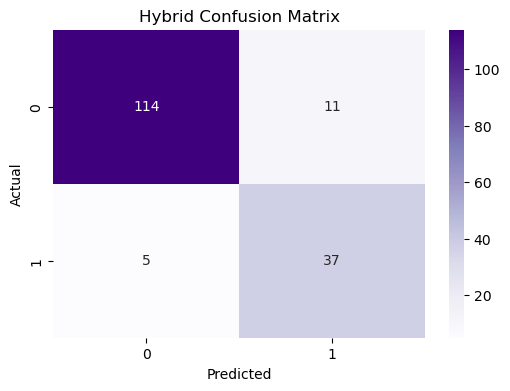

In [12]:
# Machine Learning Phase 

# 1. Import libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Define features (X) and label (y)
X = df.drop(columns=['timestamp', 'email', 'top5Achievements', 'gender', 'scholarshipStatus'])
y = df['scholarshipStatus']

# 3. Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- SVM Model ---
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

# --- Decision Tree Model ---
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# --- Hybrid Model (Voting) ---
hybrid_model = VotingClassifier(estimators=[
    ('svm', svm_model),
    ('dt', dt_model)
], voting='soft')

hybrid_model.fit(X_train, y_train)
hybrid_predictions = hybrid_model.predict(X_test)

# --- Evaluation ---

# SVM
print("----- Support Vector Machine (SVM) Results -----")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))

# Decision Tree
print("----- Decision Tree Results -----")
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print(classification_report(y_test, dt_predictions))

# Hybrid
print("----- Hybrid (SVM + Decision Tree) Results -----")
print("Accuracy:", accuracy_score(y_test, hybrid_predictions))
print(classification_report(y_test, hybrid_predictions))

# Confusion Matrix - Hybrid
hybrid_cm = confusion_matrix(y_test, hybrid_predictions)
plt.figure(figsize=(6,4))
sns.heatmap(hybrid_cm, annot=True, fmt="d", cmap="Purples")
plt.title("Hybrid Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
